# 0.0 Imports

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import random

## 1.0 Gráficos 

- Utilizando dados sintéticos 

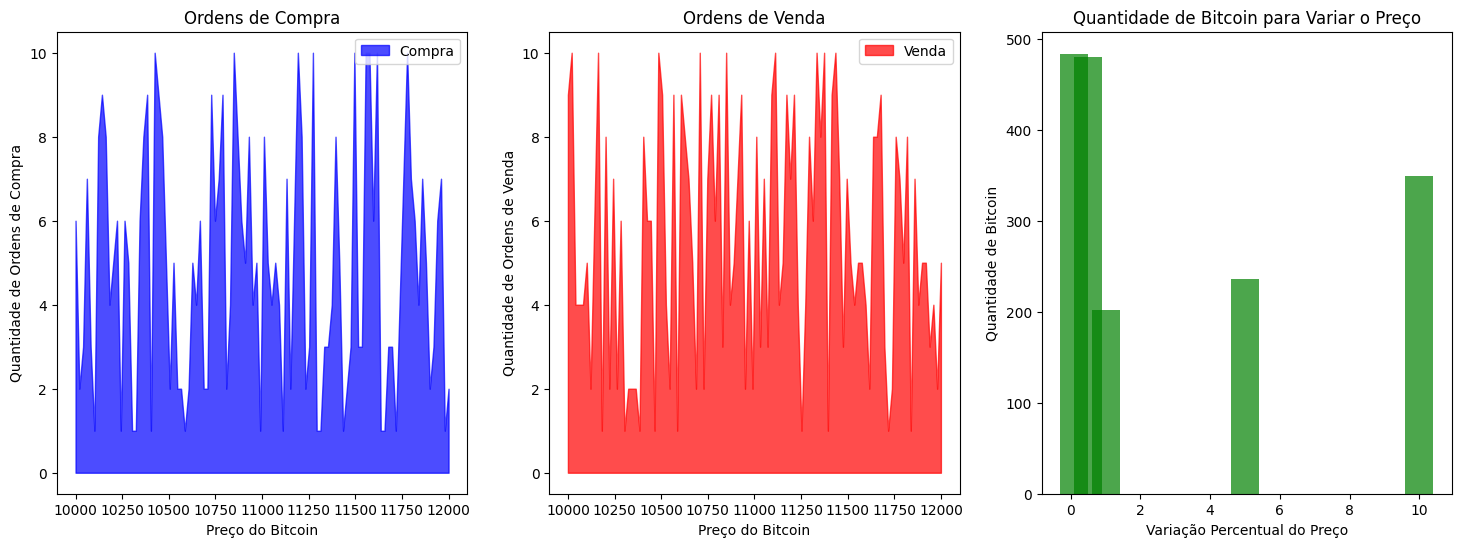

In [5]:
# Função para gerar dados sintéticos
def generate_synthetic_data(num_points=100):
    prices = np.linspace(10000, 12000, num_points)
    buy_orders = [random.randint(1, 10) for _ in range(num_points)]
    sell_orders = [random.randint(1, 10) for _ in range(num_points)]
    return prices, buy_orders, sell_orders

# Função para atualizar os dados e plotar as visualizações
def update_and_plot(ax1, ax2, ax3):
    prices, buy_orders, sell_orders = generate_synthetic_data()

    ax1.clear()
    ax1.fill_between(prices, buy_orders, color='b', alpha=0.7, label='Compra')
    ax1.set_title('Ordens de Compra')
    ax1.set_xlabel('Preço do Bitcoin')
    ax1.set_ylabel('Quantidade de Ordens de Compra')
    ax1.legend()

    ax2.clear()
    ax2.fill_between(prices, sell_orders, color='r', alpha=0.7, label='Venda')
    ax2.set_title('Ordens de Venda')
    ax2.set_xlabel('Preço do Bitcoin')
    ax2.set_ylabel('Quantidade de Ordens de Venda')
    ax2.legend()

    ax3.clear()
    price_variation = [0.1, 0.5, 1.0, 5.0, 10.0]
    btc_to_trade = [random.uniform(100, 500) for _ in range(len(price_variation))]
    ax3.bar(price_variation, btc_to_trade, color='g', alpha=0.7)
    ax3.set_title('Quantidade de Bitcoin para Variar o Preço')
    ax3.set_xlabel('Variação Percentual do Preço')
    ax3.set_ylabel('Quantidade de Bitcoin')

    plt.pause(1)  
    plt.show()

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 6))  

for _ in range(10):
    update_and_plot(ax1, ax2, ax3)

plt.show()

In [6]:
import requests

url = "https://brasilbitcoin.com.br/API/orderbook/BTC"

response = requests.get(url)

data = response.json()

print(data)

{'buy': [{'id': 436514584, 'preco': 209634.7, 'quantidade': 0.07212937, 'valor': 15120.82}, {'id': 436514581, 'preco': 209634.69, 'quantidade': 0.35319744, 'valor': 74042.44}, {'id': 436514578, 'preco': 209634.58, 'quantidade': 0.05948, 'valor': 12469.06}, {'id': 436514564, 'preco': 209603.53, 'quantidade': 0.32764875, 'valor': 68676.33}, {'id': 436514424, 'preco': 208439, 'quantidade': 0.05, 'valor': 10421.95}, {'id': 436514401, 'preco': 208438.25, 'quantidade': 1.01438915, 'valor': 211437.5}, {'id': 436260202, 'preco': 208000, 'quantidade': 2.404e-05, 'valor': 5}, {'id': 436476163, 'preco': 208000, 'quantidade': 0.00240385, 'valor': 500}, {'id': 436497345, 'preco': 208000, 'quantidade': 0.00083649, 'valor': 173.99}, {'id': 436505172, 'preco': 208000, 'quantidade': 0.00240385, 'valor': 500}, {'id': 436256156, 'preco': 207920.01, 'quantidade': 0.02404771, 'valor': 5000}, {'id': 436260093, 'preco': 207000, 'quantidade': 2.415e-05, 'valor': 5}, {'id': 436260001, 'preco': 206000, 'quantid

In [7]:
buy_orders = data['buy']
sell_orders = data['sell']

# print("Buy Orders:")
# for order in buy_orders:
#     print(f"Price: {order['preco']}, Quantity: {order['quantidade']}")

# print("\nSell Orders:")
# for order in sell_orders:
#     print(f"Price: {order['preco']}, Quantity: {order['quantidade']}")

In [10]:
import pandas as pd
dataframe = pd.DataFrame(buy_orders)

In [13]:
buy_orders = pd.DataFrame(data['buy'])
sell_orders = pd.DataFrame(data['sell'])

buy_orders['compra_venda'] = 'compra'
sell_orders['compra_venda'] = 'venda'

df_brasil_bitcoin = pd.concat([buy_orders,sell_orders])

In [14]:
df_brasil_bitcoin

,id,preco,quantidade,valor,compra_venda
0,436514584,209634.70,0.072129,15120.82,compra
1,436514581,209634.69,0.353197,74042.44,compra
2,436514578,209634.58,0.059480,12469.06,compra
3,436514564,209603.53,0.327649,68676.33,compra
4,436514424,208439.00,0.050000,10421.95,compra
...,...,...,...,...,...
45,435183918,229999.99,0.005118,1177.13,venda
46,434596499,230000.00,0.000023,5.35,venda
47,434997183,230000.00,0.005092,1171.09,venda
48,436465897,230000.00,0.077592,17846.13,venda
